**временные ряды и модели регрессии**

Евгений Борисов <esborisov@sevsu.ru>

-----

Дмитрий Макаров   Временные ряды.    
https://www.dmitrymakarov.ru/intro/time-series-20/

Евгений Рябенко Прогнозирование временных рядов.     
https://www.youtube.com/watch?v=u433nrxdf5k

-----

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt
import pandas as pd
#from tqdm.auto import tqdm
#tqdm.pandas()
np.set_printoptions(precision=2)

---

AirPassengers.csv

https://drive.google.com/file/d/1yfw6gcgmJXCtxkjC69ekUvsEtAiYTlST/view?usp=share_link

https://huggingface.co/spaces/Anniek/Time_series_forecast/raw/main/AirPassengers.csv

In [2]:
# читаем данные
url = 'https://huggingface.co/spaces/Anniek/Time_series_forecast/raw/main/AirPassengers.csv'
df = pd.read_csv(url).convert_dtypes()
display(len(df))
display(df.info())
display(df.describe().T)

144

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    string
 1   #Passengers  144 non-null    Int64 
dtypes: Int64(1), string(1)
memory usage: 2.5 KB


None

,count,mean,std,min,25%,50%,75%,max
#Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [3]:
df['dt'] = pd.to_datetime(df['Month'])
df = df.set_index('dt')
df = df[['#Passengers']]

display(df.sample(3))

,#Passengers
dt,
1953-07-01,264
1949-03-01,132
1959-06-01,472


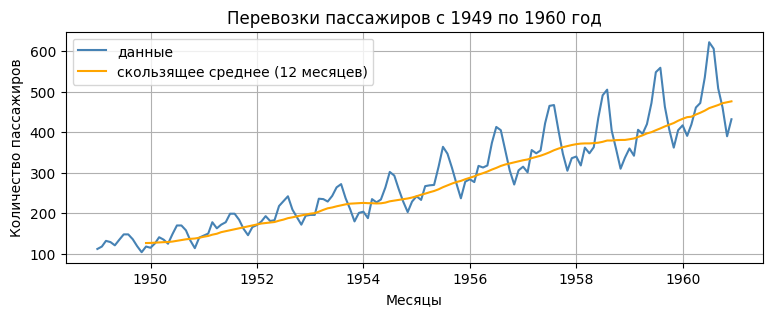

In [4]:
fig,ax = plt.subplots(figsize = (9,3))
ax.plot(df['#Passengers'], label = 'данные', color = 'steelblue')
ax.plot(df['#Passengers'].rolling(window=12).mean(), label = 'скользящее среднее (12 месяцев)', color = 'orange')
ax.set_xlabel('Месяцы', )
ax.set_ylabel('Количество пассажиров',)
ax.set_title('Перевозки пассажиров с 1949 по 1960 год', )
ax.legend(title = '', loc = 'upper left', )
ax.grid()

__Автокорреляция__

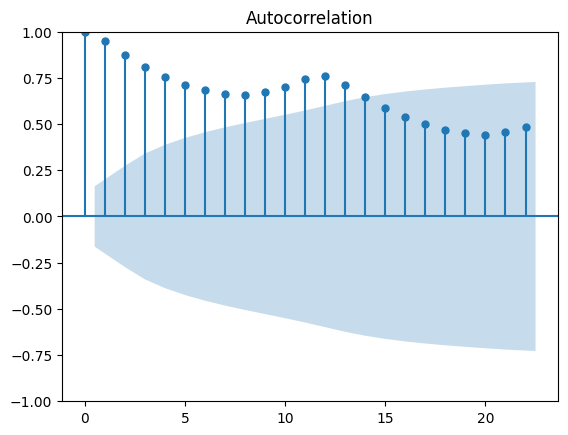

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['#Passengers'])
plt.show()

# модель

## простая регрессия

In [5]:
from sklearn.preprocessing import PolynomialFeatures

degree = 9

y = df['#Passengers'].values

x =  PolynomialFeatures( 
        degree=degree, 
        interaction_only=False, 
        include_bias=True,
    ).fit_transform( np.arange(len(y)).reshape(-1,1) )

In [6]:
from sklearn.linear_model import LinearRegression
    
df['regr']  = LinearRegression().fit(x,y).predict(x)

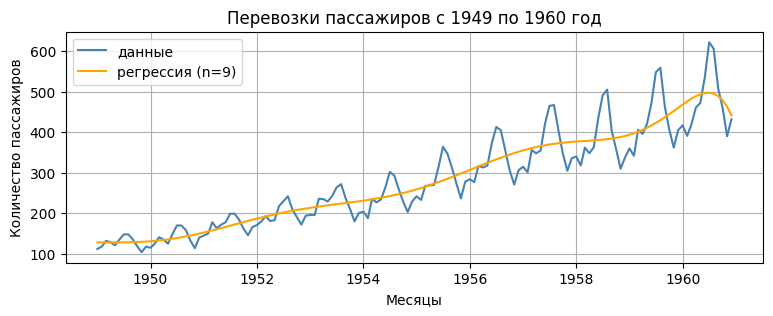

In [7]:
fig,ax = plt.subplots(figsize = (9,3))
ax.plot(df['#Passengers'], label = 'данные', color = 'steelblue')
ax.plot(df['regr'], label = f'регрессия (n={degree})', color = 'orange')
ax.set_xlabel('Месяцы', )
ax.set_ylabel('Количество пассажиров',)
ax.set_title('Перевозки пассажиров с 1949 по 1960 год', )
ax.legend(title = '', loc = 'upper left', )
ax.grid()

# оценка 

In [15]:
err = df['#Passengers'] - df['regr']

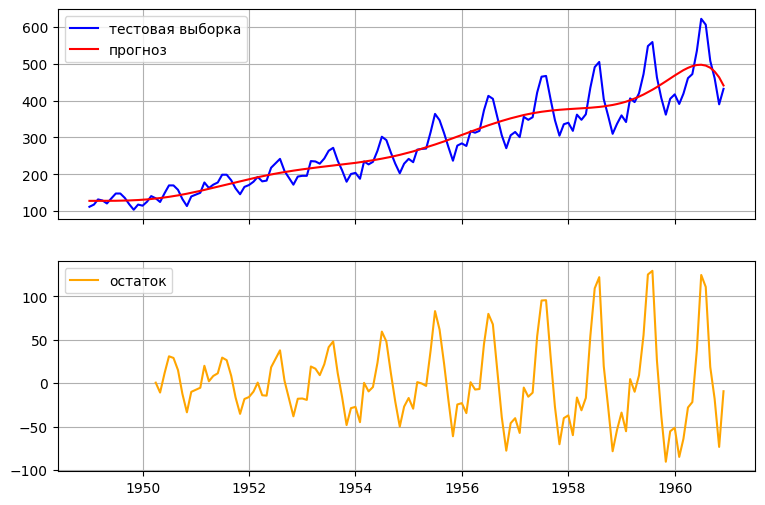

In [14]:
fig,ax = plt.subplots(2,1,figsize = (9,6),sharex=True)
ax[0].plot(df['#Passengers'], color = 'blue',label='тестовая выборка')
ax[0].plot(df['regr'], color = 'red',label='прогноз')
ax[0].grid()
ax[0].legend()
ax[1].plot(err[15:], color = 'orange',label='остаток')
ax[1].grid()
ax[1].legend()

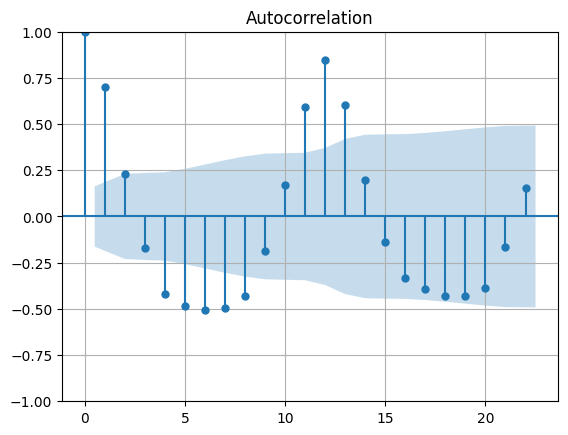

In [12]:
# оценка автокореляции остатков

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(err.fillna(0.))
plt.grid()
plt.show()